## Set up

In [0]:
# https://docs.google.com/spreadsheets/d/1xFuaFZD2jyGPk80KKk40dPqqZyZqQ6je-_fV7RDWLcc/edit#gid=2144373278

# Day/Time | Frequency | Delivery Pattern

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [0]:
dataset = pd.read_csv(
    "/content/gdrive/My Drive/Google Ads Manager (Mar 6, 2019 - Apr 4, 2019) - google ads sample 30 days.csv",
    nrows=7345
)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7345 entries, 0 to 7344
Data columns (total 19 columns):
Date                       7345 non-null object
Ad locations               7345 non-null object
Branding types             7345 non-null object
Targeting types            7345 non-null object
Advertiser verticals       7345 non-null object
Ad requests                7345 non-null object
Matched requests           7345 non-null object
Coverage                   7345 non-null object
Clicks                     7345 non-null int64
Ad request CTR             7345 non-null object
CTR                        7345 non-null object
Ad CTR                     7345 non-null object
CPC (THB)                  7345 non-null float64
Ad request eCPM (THB)      7345 non-null float64
Matched eCPM (THB)         7345 non-null float64
Lift                       7345 non-null object
Estimated revenue (THB)    7345 non-null object
Ad impressions             7345 non-null object
Ad eCPM (THB)              

## Bid range

In [0]:
bidrange_data = pd.read_csv(
    "/content/gdrive/My Drive/pkeaw-data.csv",
    nrows=497 
)

In [0]:
bidrange_data.head()

,#,Bid ranges (gross),Bids,Average bid CPM (gross) (THB),Estimated earnings from bids (THB),Impressions won,Winning bid CPM (gross) (THB),Close CPM (THB),Win %
0,1,THB 0.00 - THB 3.19,"2,088,654",1.51,0,0,0,0.0,0.00%
1,2,THB 3.19 - THB 6.39,"597,013",4.31,0,0,0,0.0,0.00%
2,3,THB 6.39 - THB 9.58,"225,738",7.94,0,0,0,0.0,0.00%
3,4,THB 9.58 - THB 12.77,"256,984",11.21,0,0,0,0.0,0.00%
4,5,THB 12.77 - THB 15.97,"290,400",14.62,0,0,0,0.0,0.00%


In [0]:
import re
### bid floor ###
# bidrange_data['bid_floor'] = bidrange_data['Bid ranges (gross)']\
# .apply(lambda row: float(re.findall(r'([\d.,]+)', row)[1].replace(',', '')))
# bidrange_data[['bid_floor']].sort_values(by='bid_floor')

### plot ###
# bidrange_plot = bidrange_data[['bid_floor', 'Bids', 'Estimated earnings from bids (THB)', 'Win %']].copy()
bidrange_plot = bidrange_data[['Average bid CPM (gross) (THB)', 'Bids', 'Estimated earnings from bids (THB)', 'Win %', 'Winning bid CPM (gross) (THB)', 'Close CPM (THB)']].copy()
bidrange_plot['Average bid CPM (gross) (THB)'] = bidrange_plot['Average bid CPM (gross) (THB)']\
.apply(lambda row: row.replace(',', '')).astype('float')
bidrange_plot['Bids'] = bidrange_plot['Bids']\
.apply(lambda row: row.replace(',', '')).astype('int')
bidrange_plot['Estimated earnings from bids (THB)'] = bidrange_plot['Estimated earnings from bids (THB)']\
.apply(lambda row: row.replace(',', '')).astype('float')
bidrange_plot['Win %'] = bidrange_plot['Win %']\
.apply(lambda row: row.replace('%', '')).astype('float')

# plot gap revenue
bidrange_plot['Winning bid CPM (gross) (THB)'] = bidrange_plot['Winning bid CPM (gross) (THB)']\
.apply(lambda row: row.replace(',', '')).astype('float')
bidrange_plot['Close CPM (THB)'] = bidrange_plot['Close CPM (THB)']\
# .apply(lambda row: row.replace(',', '')).astype('float')

bidrange_plot.head()

,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
0,1.51,2088654,0.0,0.0,0.0,0.0
1,4.31,597013,0.0,0.0,0.0,0.0
2,7.94,225738,0.0,0.0,0.0,0.0
3,11.21,256984,0.0,0.0,0.0,0.0
4,14.62,290400,0.0,0.0,0.0,0.0


In [0]:
bidrange_plot.describe()

,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
count,497.000000,4.970000e+02,497.000000,497.000000,497.000000,497.000000
mean,794.057867,1.006706e+04,22.327767,93.266559,793.335352,78.784588
std,459.462837,1.019428e+05,91.312475,19.382677,460.684682,45.403665
min,1.510000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,397.540000,7.000000e+00,0.580000,95.240000,397.550000,63.870000
50%,793.660000,2.500000e+01,1.640000,100.000000,793.660000,68.190000
75%,1189.870000,8.100000e+01,4.580000,100.000000,1189.870000,80.770000
max,1595.380000,2.088654e+06,1280.180000,100.000000,1595.380000,542.920000


In [0]:
bidrange_plot[['Winning bid CPM (gross) (THB)', 'Close CPM (THB)']].mean()

Winning bid CPM (gross) (THB)    793.335352
Close CPM (THB)                   78.784588
dtype: float64

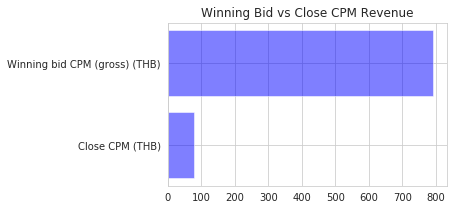

In [0]:
fig, ax = plt.subplots(figsize=(5,3))
ax.barh(
    ['Close CPM (THB)', 'Winning bid CPM (gross) (THB)'],
    [bidrange_plot['Close CPM (THB)'].mean(), bidrange_plot['Winning bid CPM (gross) (THB)'].mean()],
    align='center',
    alpha=.5,
    color='b'
)

# plt.ylabel('Advertiser verticals')
# plt.xlabel('Ad eCPM (THB)')
plt.title('Winning Bid vs Close CPM Revenue')
plt.show()

In [0]:
# Win % > 80 % and quarter 1
bidrange_plot = bidrange_plot.loc[bidrange_plot['Win %'] >= 80.]
bidrange_plot = bidrange_plot.loc[bidrange_plot['Average bid CPM (gross) (THB)'] < 400.]

In [0]:
bidrange_plot.sort_values(
    by=['Bids', 'Estimated earnings from bids (THB)'], 
    ascending=False
).head()

,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
42,136.09,7470,432.40,94.07,136.09,61.53
43,138.63,5966,340.57,92.52,138.61,61.70
30,97.00,4955,245.03,84.10,96.97,58.80
48,155.55,3361,203.16,94.53,155.57,63.95
36,116.70,3191,179.17,93.61,116.71,59.98


In [0]:
bidrange_plot.head()

,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
30,97.00,4955,245.03,84.10,96.97,58.80
32,103.79,3014,154.33,87.09,103.77,58.79
33,106.96,2855,153.55,90.65,106.97,59.33
34,110.05,2850,156.57,93.12,110.05,59.00
35,113.33,2265,125.56,93.73,113.34,59.14


In [0]:
bidrange_plot.tail()

,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
120,384.80,71,4.44,94.37,384.80,66.23
121,388.03,81,5.32,96.30,388.02,68.25
122,391.06,90,6.01,97.78,391.07,68.27
123,394.43,81,5.87,97.53,394.42,74.30
124,397.54,65,4.69,98.46,397.55,73.27


In [0]:
bidrange_plot.describe()

,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,250.329785,813.440860,47.214301,94.591183,250.330000,65.671935
std,86.678119,1274.187076,71.085824,2.518647,86.677103,4.170896
min,97.000000,62.000000,3.890000,84.100000,96.970000,58.410000
25%,177.270000,124.000000,7.230000,93.540000,177.280000,62.770000
50%,250.770000,326.000000,18.980000,94.900000,250.760000,65.620000
75%,324.130000,777.000000,49.220000,96.180000,324.110000,67.850000
max,397.540000,7470.000000,432.400000,98.940000,397.550000,79.700000


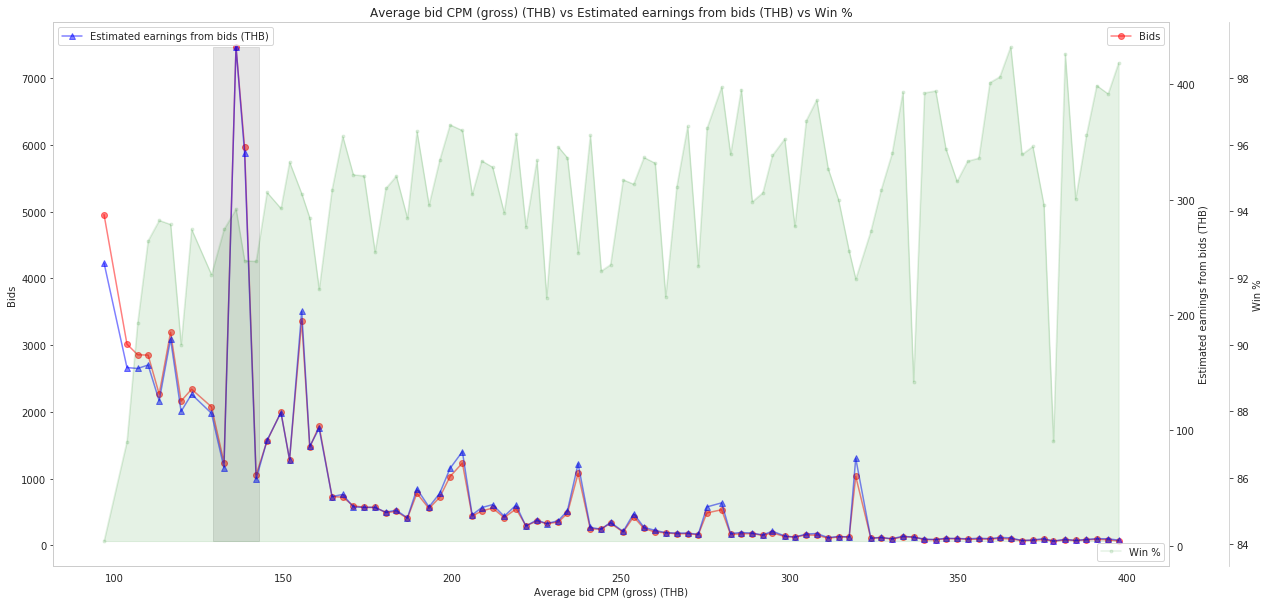

In [0]:
### To plot data ###
fig, ax1 = plt.subplots(figsize=(20, 10))

### Bids ###
ax1.plot(
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    bidrange_plot['Bids'], 
    alpha=.5, color='r', marker='o',
    label='Bids'
)

# plot the floor price line
# ax1.plot(
#     [63.56] * bidrange_plot['Bids'].shape[0], 
#     bidrange_plot['Bids'], 
#     alpha=1, color='k', label='Floor Price', linestyle='--'
# )

ax1.set_xlabel('Average bid CPM (gross) (THB)')
ax1.set_ylabel('Bids')
ax1.grid(b=None)
ax1.legend()


### Estimated earnings from bids (THB) ###
ax2 = ax1.twinx()
ax2.plot(
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    bidrange_plot['Estimated earnings from bids (THB)'], 
    alpha=.5, color='b', 
    label='Estimated earnings from bids (THB)', marker='^'
)
ax2.set_ylabel('Estimated earnings from bids (THB)')
ax2.legend(loc=2)
ax2.grid(b=None)
ax2.fill_between(
    [129.2855, 142.8945],
    bidrange_plot['Estimated earnings from bids (THB)'].min(),
    bidrange_plot['Estimated earnings from bids (THB)'].max(),
    alpha=.1, color='k'
)


### Win % ###
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  
ax3.plot(
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    bidrange_plot['Win %'], 
    alpha=.1, color='g', marker='.',
    label='Win %'
)
ax3.fill_between(
    bidrange_plot['Average bid CPM (gross) (THB)'].tolist(), 
    bidrange_plot['Win %'].min(), 
    bidrange_plot['Win %'], 
    alpha=.1, color='g'
)
ax3.grid(b=None)
ax3.set_ylabel('Win %')
ax3.legend(loc=4)


# plt.gcf().autofmt_xdate()
plt.title('Average bid CPM (gross) (THB) vs Estimated earnings from bids (THB) vs Win %')
# plt.title('Average bid CPM (gross) (THB) vs Estimated earnings from bids (THB)')
plt.show()

In [0]:
bidrange_plot.head()

,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
30,97.00,4955,245.03,84.10,96.97,58.80
32,103.79,3014,154.33,87.09,103.77,58.79
33,106.96,2855,153.55,90.65,106.97,59.33
34,110.05,2850,156.57,93.12,110.05,59.00
35,113.33,2265,125.56,93.73,113.34,59.14


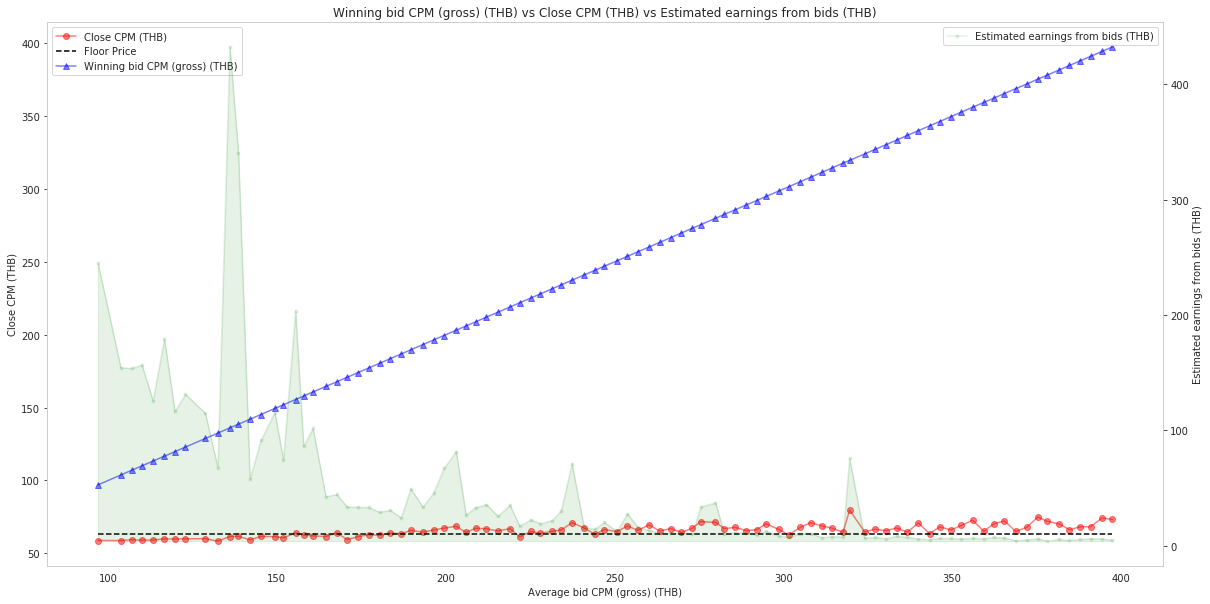

In [0]:
### To plot data ###
fig, ax1 = plt.subplots(figsize=(20, 10))

### Close CPM (THB) ###
ax1.plot(
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    bidrange_plot['Close CPM (THB)'], 
    alpha=.5, color='r', marker='o',
    label='Close CPM (THB)'
)

# plot the floor price line
ax1.plot(    
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    [63.56] * bidrange_plot['Average bid CPM (gross) (THB)'].shape[0], 
    alpha=1, color='k', label='Floor Price', linestyle='--'
)

ax1.set_xlabel('Average bid CPM (gross) (THB)')
ax1.set_ylabel('Close CPM (THB)')
ax1.grid(b=None)
ax1.legend()

### Winning bid CPM (gross) (THB) ###
# ax2 = ax1.twinx()
ax1.plot(
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    bidrange_plot['Winning bid CPM (gross) (THB)'], 
    alpha=.5, color='b', 
    label='Winning bid CPM (gross) (THB)', marker='^'
)
ax1.legend()


### Estimated earnings from bids (THB) ###
ax3 = ax1.twinx()
# ax3.spines['right'].set_position(('outward', 60))  
ax3.plot(
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    bidrange_plot['Estimated earnings from bids (THB)'], 
    alpha=.1, color='g', marker='.',
    label='Estimated earnings from bids (THB)'
)
ax3.fill_between(
    bidrange_plot['Average bid CPM (gross) (THB)'].tolist(), 
    bidrange_plot['Estimated earnings from bids (THB)'].min(), 
    bidrange_plot['Estimated earnings from bids (THB)'], 
    alpha=.1, color='g'
)

ax3.grid(b=None)
ax3.set_ylabel('Estimated earnings from bids (THB)')
ax3.legend(loc=1)

# plt.gcf().autofmt_xdate()
plt.title('Winning bid CPM (gross) (THB) vs Close CPM (THB) vs Estimated earnings from bids (THB)')
plt.show()

In [0]:
### First-Price vs Second-Price Auction ###

## True bid range

In [0]:
bidrange_data = pd.read_csv(
    "/content/gdrive/My Drive/True bid range (Mar 30, 2019 - Apr 28, 2019).csv",
    nrows=378
)

In [0]:
import re
### bid floor ###
# bidrange_data['bid_floor'] = bidrange_data['Bid ranges (gross)']\
# .apply(lambda row: float(re.findall(r'([\d.,]+)', row)[1].replace(',', '')))
# bidrange_data[['bid_floor']].sort_values(by='bid_floor')

### plot ###
# bidrange_plot = bidrange_data[['bid_floor', 'Bids', 'Estimated earnings from bids (THB)', 'Win %']].copy()
bidrange_plot = bidrange_data[['Average bid CPM (gross) (THB)', 'Bids', 'Estimated earnings from bids (THB)', 'Win %', 'Winning bid CPM (gross) (THB)', 'Close CPM (THB)']].copy()
bidrange_plot['Average bid CPM (gross) (THB)'] = bidrange_plot['Average bid CPM (gross) (THB)']\
.apply(lambda row: row.replace(',', '')).astype('float')
bidrange_plot['Bids'] = bidrange_plot['Bids']\
.apply(lambda row: row.replace(',', '')).astype('int')
# bidrange_plot['Estimated earnings from bids (THB)'] = bidrange_plot['Estimated earnings from bids (THB)']\
# .apply(lambda row: row.replace(',', '')).astype('float')
bidrange_plot['Win %'] = bidrange_plot['Win %']\
.apply(lambda row: row.replace('%', '')).astype('float')

# plot gap revenue
bidrange_plot['Winning bid CPM (gross) (THB)'] = bidrange_plot['Winning bid CPM (gross) (THB)']\
.apply(lambda row: row.replace(',', '')).astype('float')
bidrange_plot['Close CPM (THB)'] = bidrange_plot['Close CPM (THB)']\
# .apply(lambda row: row.replace(',', '')).astype('float')

bidrange_plot.head()

,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
0,2.29,3023,0.0,0.0,0.0,0.0
1,2.13,32569,0.0,0.0,0.0,0.0
2,4.70,4396,0.0,0.0,0.0,0.0
3,4.51,25794,0.0,0.0,0.0,0.0
4,7.75,2304,0.0,0.0,0.0,0.0


In [0]:
bidrange_plot[['Winning bid CPM (gross) (THB)', 'Close CPM (THB)']].mean()

Winning bid CPM (gross) (THB)    351.269180
Close CPM (THB)                   58.855317
dtype: float64

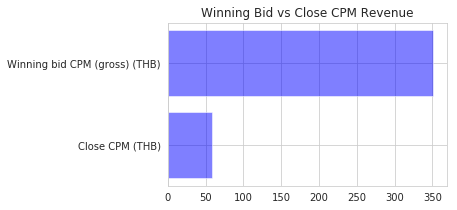

In [0]:
fig, ax = plt.subplots(figsize=(5,3))
ax.barh(
    ['Close CPM (THB)', 'Winning bid CPM (gross) (THB)'],
    [bidrange_plot['Close CPM (THB)'].mean(), bidrange_plot['Winning bid CPM (gross) (THB)'].mean()],
    align='center',
    alpha=.5,
    color='b'
)

# plt.ylabel('Advertiser verticals')
# plt.xlabel('Ad eCPM (THB)')
plt.title('Winning Bid vs Close CPM Revenue')
plt.show()

In [0]:
# Win % > 80 %
bidrange_plot = bidrange_plot.loc[bidrange_plot['Win %'] >= 80.]
bidrange_plot = bidrange_plot.loc[bidrange_plot['Average bid CPM (gross) (THB)'] < 400.]

In [0]:
bidrange_plot.sort_values(
    by=['Bids', 'Estimated earnings from bids (THB)'], 
    ascending=False
).head()

,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
51,81.12,114,6.55,94.74,81.13,60.65
55,87.30,84,4.71,92.86,87.30,60.33
53,84.22,84,4.52,88.10,84.25,61.02
63,100.06,78,4.64,97.44,100.06,61.09
57,90.53,76,4.20,93.42,90.52,59.13


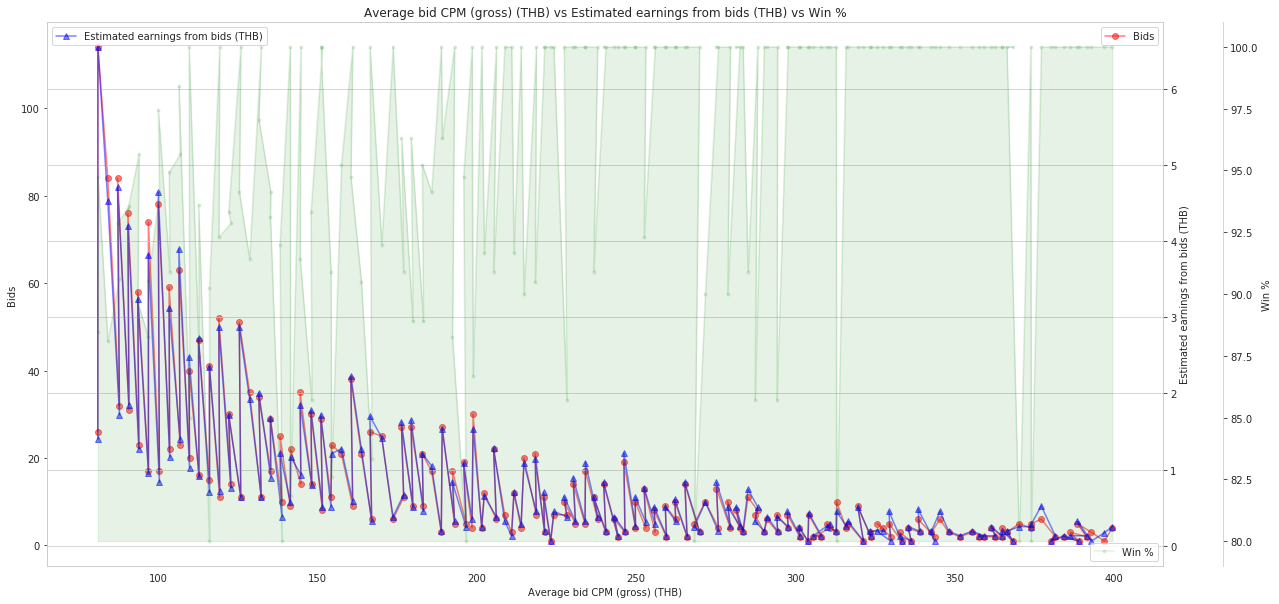

In [0]:
### To plot data ###
fig, ax1 = plt.subplots(figsize=(20, 10))

### Bids ###
ax1.plot(
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    bidrange_plot['Bids'], 
    alpha=.5, color='r', marker='o',
    label='Bids'
)

# plot the floor price line
# ax1.plot(
#     [63.56] * bidrange_plot['Bids'].shape[0], 
#     bidrange_plot['Bids'], 
#     alpha=.5, color='k', label='Floor Price', linestyle='--'
# )

ax1.set_xlabel('Average bid CPM (gross) (THB)')
ax1.set_ylabel('Bids')
ax1.grid(b=None)
ax1.legend()


### Estimated earnings from bids (THB) ###
ax2 = ax1.twinx()
ax2.plot(
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    bidrange_plot['Estimated earnings from bids (THB)'], 
    alpha=.5, color='b', 
    label='Estimated earnings from bids (THB)', marker='^'
)
ax2.set_ylabel('Estimated earnings from bids (THB)')
ax2.legend(loc=2)


### Win % ###
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  
ax3.plot(
    bidrange_plot['Average bid CPM (gross) (THB)'], 
    bidrange_plot['Win %'], 
    alpha=.1, color='g', marker='.',
    label='Win %'
)
ax3.fill_between(
    bidrange_plot['Average bid CPM (gross) (THB)'].tolist(), 
    bidrange_plot['Win %'].min(), 
    bidrange_plot['Win %'], 
    alpha=.1, color='g'
)
ax3.grid(b=None)
ax3.set_ylabel('Win %')
ax3.legend(loc=4)


# plt.gcf().autofmt_xdate()
plt.title('Average bid CPM (gross) (THB) vs Estimated earnings from bids (THB) vs Win %')
plt.show()

## Advertisers bid range 7 days ago

In [0]:
bidrange_data = pd.read_csv(
    "/content/gdrive/My Drive/explore bid range.csv",
    nrows=4869
)

In [0]:
import re
### bid floor ###
bidrange_data['bid_floor'] = bidrange_data['Bid ranges (gross)']\
.apply(lambda row: float(re.findall(r'([\d.,]+)', row)[1].replace(',', '')))
bidrange_data[['bid_floor']].sort_values(by='bid_floor')

### plot ###
# bidrange_plot = bidrange_data[['bid_floor', 'Bids', 'Estimated earnings from bids (THB)', 'Win %']].copy()
bidrange_plot = bidrange_data[['bid_floor', 'Bid ranges (gross)', 'Advertisers', 'Average bid CPM (gross) (THB)', 'Bids', 'Estimated earnings from bids (THB)', 'Win %', 'Winning bid CPM (gross) (THB)', 'Close CPM (THB)']].copy()
bidrange_plot['Average bid CPM (gross) (THB)'] = bidrange_plot['Average bid CPM (gross) (THB)']\
.apply(lambda row: row.replace(',', '')).astype('float')
bidrange_plot['Bids'] = bidrange_plot['Bids']\
.apply(lambda row: row.replace(',', '')).astype('int')
# bidrange_plot['Estimated earnings from bids (THB)'] = bidrange_plot['Estimated earnings from bids (THB)']\
# .apply(lambda row: row.replace(',', '')).astype('float')
bidrange_plot['Win %'] = bidrange_plot['Win %']\
.apply(lambda row: row.replace('%', '')).astype('float')

# plot gap revenue
bidrange_plot['Winning bid CPM (gross) (THB)'] = bidrange_plot['Winning bid CPM (gross) (THB)']\
.apply(lambda row: row.replace(',', '')).astype('float')
bidrange_plot['Close CPM (THB)'] = bidrange_plot['Close CPM (THB)']\
# .apply(lambda row: row.replace(',', '')).astype('float')


bidrange_plot.head()

,bid_floor,Bid ranges (gross),Advertisers,Average bid CPM (gross) (THB),Bids,Estimated earnings from bids (THB),Win %,Winning bid CPM (gross) (THB),Close CPM (THB)
0,3.19,THB 0.00 - THB 3.19,Accor Group,1.78,28,0.0,0.0,0.0,0
1,3.19,THB 0.00 - THB 3.19,Adobe Systems,0.81,2,0.0,0.0,0.0,0
2,3.19,THB 0.00 - THB 3.19,Alaeo,0.58,23,0.0,0.0,0.0,0
3,3.19,THB 0.00 - THB 3.19,Alibaba Group Holding,2.49,1,0.0,0.0,0.0,0
4,3.19,THB 0.00 - THB 3.19,Alphabet,1.86,8,0.0,0.0,0.0,0


In [0]:
# Win % > 80 %
bidrange_plot = bidrange_plot.loc[bidrange_plot['Win %'] >= 80.]
bidrange_plot = bidrange_plot.loc[(bidrange_plot['bid_floor'] >= 130.) & (bidrange_plot['bid_floor'] < 140.)]

In [0]:
for group_id, group in bidrange_plot.groupby(by='Bid ranges (gross)'):
    print(group_id)
    print(group.sort_values(by=['Bids', 'Estimated earnings from bids (THB)'])[['Advertisers', 'Winning bid CPM (gross) (THB)', 'Close CPM (THB)']].head())
#     break

# bidrange_plot.sort_values(
#     by=['Bids', 'Estimated earnings from bids (THB)'], 
#     ascending=False
# ).head()

THB 127.63 - THB 130.82
              Advertisers  Winning bid CPM (gross) (THB) Close CPM (THB)
2065          Accor Group                         130.73           63.82
2068         Catcha Group                         128.65           63.82
2074  Huawei Technologies                         128.40           63.82
2083      Rocket Internet                         130.73           63.82
2086           Skyscanner                         128.85           63.82
THB 130.82 - THB 134.02
               Advertisers  Winning bid CPM (gross) (THB) Close CPM (THB)
2102           Accor Group                         133.54           63.82
2103         Aekyung Group                         132.13           63.82
2104  Air France-KLM Group                         133.66           63.82
2106          BCD Holdings                         131.78           63.82
2114                   IAC                         132.61           63.82
THB 134.02 - THB 137.21
                                          Adve

## Data Cleaning

In [0]:
dataset = pd.read_csv(
    "/content/gdrive/My Drive/Google Ads Manager (Mar 6, 2019 - Apr 4, 2019) - google ads sample 30 days.csv",
    nrows=7345
)

In [0]:
# Todo astype 
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%m/%d/%y')  
dataset['Ad requests'] = dataset['Ad requests']\
.apply(lambda row: str(row).replace(',', '')).astype('int')
dataset['Matched requests'] = dataset['Matched requests']\
.apply(lambda row: str(row).replace(',', '')).astype('int')
dataset['Clicks'] = dataset['Clicks']\
.apply(lambda row: str(row).replace(',', '')).astype('int')
dataset['CPC (THB)'] = dataset['CPC (THB)']\
.apply(lambda row: str(row).replace(',', '')).astype('float')
dataset['Ad request eCPM (THB)'] = dataset['Ad request eCPM (THB)']\
.apply(lambda row: str(row).replace(',', '')).astype('float')
dataset['Matched eCPM (THB)'] = dataset['Matched eCPM (THB)']\
.apply(lambda row: str(row).replace(',', '')).astype('float')
dataset['Estimated revenue (THB)'] = dataset['Estimated revenue (THB)']\
.apply(lambda row: str(row).replace(',', '')).astype('float')
dataset['Ad impressions'] = dataset['Ad impressions']\
.apply(lambda row: str(row).replace(',', '')).astype('int')
dataset['Ad eCPM (THB)'] = dataset['Ad eCPM (THB)']\
.apply(lambda row: str(row).replace(',', '')).astype('float')

In [0]:
dow_dict = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun',
    -1: '66'
}
import datetime as dt
dataset['Dow'] = dataset['Date'].dt.dayofweek
dataset['Week'] = dataset['Date'].dt.week

In [0]:
# dataset.groupby(by=['Week', 'Dow']).sum()[['Ad requests', 'Ad impressions']]

In [0]:
day_effect = dataset.groupby(by=['Week', 'Dow'])[['Ad request eCPM (THB)', 'Ad eCPM (THB)']].sum().reset_index()
day_effect['Week'] = day_effect['Week'].rank(method='dense', ascending=1)
day_effect['Dow'] = day_effect['Dow'].apply(lambda d: dow_dict[d])

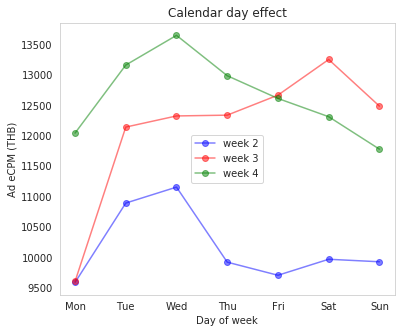

In [0]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(6,5))

# plot the data
# plt.plot(
#     day_effect.loc[day_effect['Week'] == 1]['Dow'], 
#     day_effect.loc[day_effect['Week'] == 1]['Ad eCPM (THB)'], 
#     alpha=.5, color='m', label=f'week {int(1)}', marker='s'
# )
ax.plot(
    day_effect.loc[day_effect['Week'] == 2]['Dow'], 
    day_effect.loc[day_effect['Week'] == 2]['Ad eCPM (THB)'], 
    alpha=.5, color='b', label=f'week {int(2)}', marker='o'
)
ax.plot(
    day_effect.loc[day_effect['Week'] == 3]['Dow'], 
    day_effect.loc[day_effect['Week'] == 3]['Ad eCPM (THB)'], 
    alpha=.5, color='r', label=f'week {int(3)}', marker='o'
)
ax.plot(
    day_effect.loc[day_effect['Week'] == 4]['Dow'], 
    day_effect.loc[day_effect['Week'] == 4]['Ad eCPM (THB)'], 
    alpha=.5, color='g', label=f'week {int(4)}', marker='o'
)
# plt.plot(
#     day_effect.loc[day_effect['Week'] == 5]['Dow'], 
#     day_effect.loc[day_effect['Week'] == 5]['Ad eCPM (THB)'], 
#     alpha=.5, color='c', label=f'week {int(5)}', marker='s'
# )
ax.grid()

# ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xlabel('Day of week')
plt.ylabel('Ad eCPM (THB)')
plt.title('Calendar day effect')
ax.legend()
# plt.gcf().autofmt_xdate()
plt.show()

In [0]:
numberic_cols = [
    ### standard metrics ###
    'Estimated revenue (THB)', 
    'CPC (THB)',
    'Clicks',

    # Ad request CPM balances eCPM and Fill Rate
    'Ad requests', 
    'Ad request eCPM (THB)', 
    'Ad impressions', 
    'Ad eCPM (THB)',
    'Matched requests',  
    'Matched eCPM (THB)', 
]
percentage_cols = [
    'Coverage', 
    'Ad request CTR',
    'Ad CTR', 
    'CTR', 
    'Lift'
]

## Exploring

In [0]:
dataset.head()

,Date,Ad locations,Branding types,Targeting types,Advertiser verticals,Ad requests,Matched requests,Coverage,Clicks,Ad request CTR,...,Ad CTR,CPC (THB),Ad request eCPM (THB),Matched eCPM (THB),Lift,Estimated revenue (THB),Ad impressions,Ad eCPM (THB),Dow,Week
0,2019-03-06,Above the fold,(Unmatched ad requests),(Unmatched ad requests),(unknown),2833,0,0.00%,0,0.00%,...,0.00%,0.0,0.00,0.00,0.00%,0.00,0,0.00,2,10
1,2019-03-06,Above the fold,Anonymous,(unknown),Arts & Entertainment,1,1,100.00%,0,0.00%,...,0.00%,0.0,9.69,9.69,0.00%,0.01,1,9.69,2,10
2,2019-03-06,Above the fold,Anonymous,(unknown),Business & Industrial,1,1,100.00%,0,0.00%,...,0.00%,0.0,9.66,9.66,0.00%,0.01,1,9.66,2,10
3,2019-03-06,Above the fold,Anonymous,(unknown),Finance,1,1,100.00%,0,0.00%,...,0.00%,0.0,9.66,9.66,4650.00%,0.01,1,9.66,2,10
4,2019-03-06,Above the fold,Anonymous,Contextual,Business & Industrial,1,1,100.00%,0,0.00%,...,0.00%,0.0,9.74,9.74,0.00%,0.01,1,9.74,2,10


### Coverage vs Ad request eCPM vs Ad eCPM

In [0]:
versus = dataset[['Date', 'Ad impressions', 'Ad requests', 'Ad request eCPM (THB)', 'Ad eCPM (THB)']]\
.groupby(by='Date').mean()
versus['Fill Rate'] = versus['Ad impressions'] / versus['Ad requests'] * 100.0
data = versus.reset_index().sort_values(by='Date')
data.head()

,Date,Ad impressions,Ad requests,Ad request eCPM (THB),Ad eCPM (THB),Fill Rate
0,2019-03-06,414.522388,18436.437811,41.297910,43.557512,2.248387
1,2019-03-07,248.638298,19170.547872,41.967819,43.306755,1.296981
2,2019-03-08,340.219895,13759.942408,40.931990,43.060785,2.472539
3,2019-03-09,410.618557,14906.128866,46.994794,48.806907,2.754696
4,2019-03-10,474.010204,16656.020408,44.011735,46.243827,2.845879


Number of days: 30


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


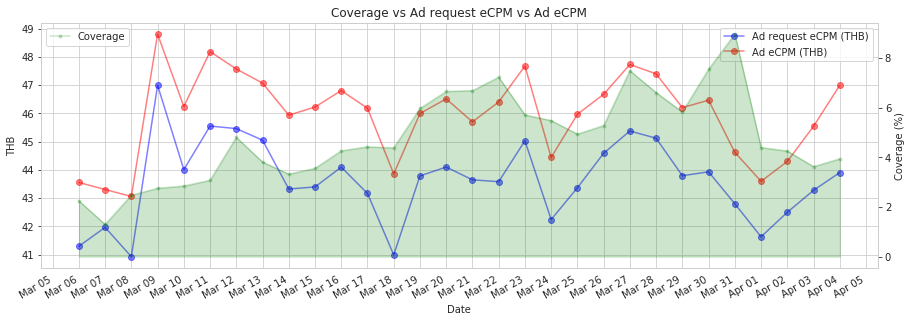

In [0]:
%matplotlib inline
import matplotlib.dates as mdates

print(f"Number of days: {data.Date.nunique()}")
# data = data[['Date', 'Clicks']]
# data.set_index('Date',inplace=True)

#plot data
fig, ax1 = plt.subplots(figsize=(15,5))

# plot the data
ax1.plot(data['Date'], data['Ad request eCPM (THB)'], alpha=.5, color='b', label='Ad request eCPM (THB)', marker='o')
ax1.plot(data['Date'], data['Ad eCPM (THB)'], alpha=.5, color='r', label='Ad eCPM (THB)', marker='o')
# plt.
 
# plot the average line
# plt.plot(data['Date'], [data['Clicks'].mean()] * data['Clicks'].shape[0], alpha=1, color='r', label='Mean', linestyle='--')
# ax.fill_between(data['Date'].tolist(), 0, data['Clicks'].tolist(), color='b', alpha=.2)

ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.set_xlabel('Date')
ax1.set_ylabel('THB')
ax1.legend()

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('Coverage (%)')
ax2.plot(data['Date'], data['Fill Rate'], alpha=.2, color='g', label='Coverage', marker='.')
ax2.fill_between(data['Date'].tolist(), 0, data['Fill Rate'].tolist(), alpha=.2, color='g')
ax2.xaxis.set_major_locator(mdates.DayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.legend(loc=2)
ax2.grid(b=None)

plt.title('Coverage vs Ad request eCPM vs Ad eCPM')
plt.gcf().autofmt_xdate()
plt.show()

# This metric

### By Advertiser verticals

In [0]:
print(dataset['Advertiser verticals'].unique(), '\n')
print(f"Number of Advertiser verticals: {dataset['Advertiser verticals'].nunique()}")

['(unknown)' 'Arts & Entertainment' 'Business & Industrial' 'Finance'
 'Internet & Telecom' 'Apparel' 'Autos & Vehicles'
 'Beauty & Personal Care' 'Family & Community' 'Home & Garden'
 'News, Books & Publications' 'Real Estate' 'Travel & Tourism'
 'Dining & Nightlife' 'Jobs & Education'
 'Computers & Consumer Electronics' 'Food & Groceries' 'Health'
 'Hobbies, Games & Leisure' 'Law & Government' 'Mobile Apps'
 'Occasions & Gifts' 'Sports & Fitness'] 

Number of Advertiser verticals: 23


In [0]:
### eCPM in Ad Exchange ###

# 'Ad requests' > 'Matched requests' > 'Ad impressions'
funnel_data = dataset[['Date', 'Ad requests', 'Matched requests', 'Ad impressions']].copy(deep=True)
# .sort_values(by='Ad impressions', ascending=False)
total_ad_requests = funnel_data['Ad requests'].sum()
total_matched_requests = funnel_data['Matched requests'].sum()
total_ad_impressions = funnel_data['Ad impressions'].sum()
print(total_ad_requests, total_matched_requests, total_ad_impressions)

funnel = map(
    lambda d: (d / total_ad_requests) * 100.0, 
    [total_ad_requests, total_matched_requests, total_ad_impressions]
)
list(funnel)

101249694 5089714 4836778


[100.0, 5.026893217079747, 4.7770791287527254]

In [0]:
### stats ###
stat_data = dataset[['Date', 'Ad requests', 'Matched requests']]\
.groupby(by='Date').sum().reset_index().sort_values(by='Date', ascending=True)

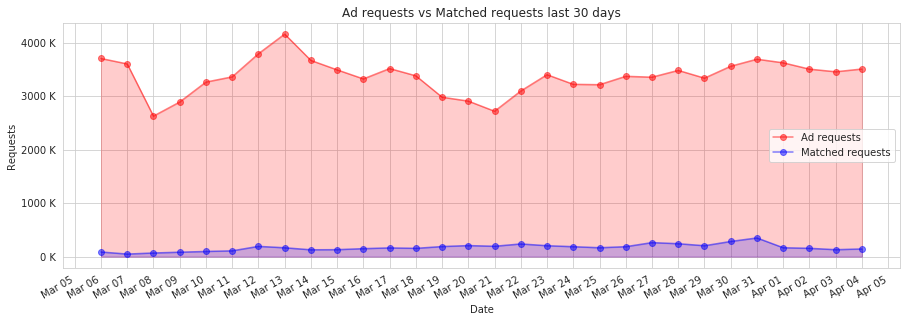

In [0]:
### plot ###
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))

# plot the data
plt.plot(
    stat_data['Date'], 
    stat_data['Ad requests'], 
    alpha=.5, color='r', marker='o',
    label='Ad requests'
)

plt.plot(
    stat_data['Date'], 
    stat_data['Matched requests'], 
    alpha=.5, color='b', marker='o',
    label='Matched requests'
)

    
# plot the average line
# plt.plot(
#     data['Date'], 
#     [data['Ad request eCPM (THB)'].mean()] * data['Ad request eCPM (THB)'].shape[0], 
#     alpha=1, color='r', linestyle='--',
#     label='Mean'
# )
ax.fill_between(
    stat_data['Date'].tolist(), 0, stat_data['Ad requests'].tolist(), 
    color='r', alpha=.2
)
ax.fill_between(
    stat_data['Date'].tolist(), 0, stat_data['Matched requests'].tolist(), 
    color='b', alpha=.2
)
# ax.bar(lost_revenue['Date'].tolist(), lost_revenue['Ad requests'])
# ax.bar(get_revenue['Date'].tolist(), get_revenue['Ad requests'], color='b', alpha=.5)


ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
formatter = ticker.FuncFormatter(lambda x, pos:"{:} K".format(int(x / 1000)))
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('Date')
plt.ylabel('Requests')
plt.title('Ad requests vs Matched requests last 30 days')
ax.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [0]:
# top-sum
top = dataset[['Advertiser verticals', 'Date'] + numberic_cols]\
.groupby(by=['Advertiser verticals']).mean()\
.sort_values(by='Ad eCPM (THB)', ascending=False).reset_index()[:10]\
.sort_values(by='Ad eCPM (THB)')

In [0]:
top[:5]

,Advertiser verticals,Estimated revenue (THB),CPC (THB),Clicks,Ad requests,Ad request eCPM (THB),Ad impressions,Ad eCPM (THB),Matched requests,Matched eCPM (THB)
9,Business & Industrial,29.752010,3.943529,4.223039,553.125000,45.752181,539.098039,47.488529,553.125000,45.752181
8,Internet & Telecom,18.263932,2.656841,2.740909,462.518182,44.862705,440.718182,48.719159,462.518182,44.862705
7,Computers & Consumer Electronics,17.696988,3.213946,3.231928,366.686747,47.294428,354.120482,49.145181,366.686747,47.294428
6,Arts & Entertainment,164.820668,8.671406,4.421659,3249.820276,45.412327,3021.509217,49.496037,3249.820276,45.412327
5,Autos & Vehicles,102.116615,7.199055,5.865934,1727.648352,44.971626,1658.268132,49.674835,1727.648352,44.971626


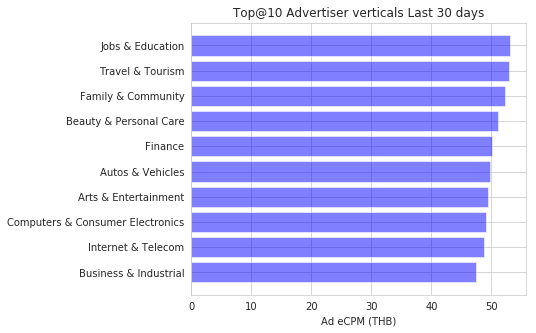

[<matplotlib.patches.Rectangle object at 0x7f4fb90c1e80>, <matplotlib.patches.Rectangle object at 0x7f4fb90c1860>, <matplotlib.patches.Rectangle object at 0x7f4fb90b5f28>, <matplotlib.patches.Rectangle object at 0x7f4fb90b5c18>, <matplotlib.patches.Rectangle object at 0x7f4fb90b5470>, <matplotlib.patches.Rectangle object at 0x7f4fbd6e4c88>, <matplotlib.patches.Rectangle object at 0x7f4fbd6e4a90>, <matplotlib.patches.Rectangle object at 0x7f4fbd6e4668>, <matplotlib.patches.Rectangle object at 0x7f4fbd6e4358>, <matplotlib.patches.Rectangle object at 0x7f4fbd6e4748>]


In [0]:
fig, ax = plt.subplots(figsize=(6,5))
ax.barh(
    top['Advertiser verticals'],
    top['Ad eCPM (THB)'],
    align='center',
    alpha=.5,
    color='b'
)
rects = ax.patches

# plt.ylabel('Advertiser verticals')
plt.xlabel('Ad eCPM (THB)')
plt.title('Top@10 Advertiser verticals Last 30 days')
plt.show()
print(rects)

In [0]:
# top-mean
top = dataset[['Advertiser verticals', 'Date'] + numberic_cols]\
.groupby(by=['Advertiser verticals']).sum()\
.sort_values(by='Estimated revenue (THB)', ascending=False).reset_index()[:10]\
.sort_values(by='Estimated revenue (THB)')

In [0]:
top[:5]

,Advertiser verticals,Estimated revenue (THB),CPC (THB),Clicks,Ad requests,Ad request eCPM (THB),Ad impressions,Ad eCPM (THB),Matched requests,Matched eCPM (THB)
9,Home & Garden,6837.55,638.44,1254,142403,12539.82,136967,13162.24,142403,12539.82
8,Family & Community,7008.63,525.86,1809,122523,16755.63,118049,17758.33,122523,16755.63
7,Apparel,7062.45,592.13,1127,178847,14235.87,171917,15280.04,178847,14235.87
6,Internet & Telecom,8036.13,1169.01,1206,203508,19739.59,193916,21436.43,203508,19739.59
5,Finance,9399.30,1930.78,860,215346,21259.58,205805,22175.59,215346,21259.58


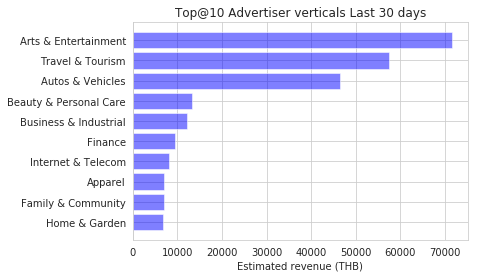

In [0]:
plt.barh(
    top['Advertiser verticals'],
    top['Estimated revenue (THB)'],
    align='center',
    alpha=0.5,
    color='b'
)
# plt.ylabel('Advertiser verticals')
plt.xlabel('Estimated revenue (THB)')
plt.title('Top@10 Advertiser verticals Last 30 days')
plt.show()

### By Day of week

In [0]:
# top-sum
# dow_dict = {'Monday': 0, 'Sunday': 6}
dow_df = dataset[['Advertiser verticals', 'Date', 'Dow'] + numberic_cols]\
.groupby(by=['Dow', 'Date']).sum()\
.sort_values(by='Estimated revenue (THB)', ascending=False)\
.reset_index()

for day in range(7):
    dow = dow_df.loc[(dow_df.Dow == day)].sort_values(by='Estimated revenue (THB)', ascending=False).reset_index()[['Date', 'Ad eCPM (THB)', 'Ad request eCPM (THB)']]
    print(dow)
    print('\n')

        Date  Ad eCPM (THB)  Ad request eCPM (THB)
0 2019-03-25       12044.41               11362.59
1 2019-04-01       11989.33               11449.25
2 2019-03-18        9605.42                8977.41
3 2019-03-11        9589.14                9065.02


        Date  Ad eCPM (THB)  Ad request eCPM (THB)
0 2019-03-12       10894.02               10410.96
1 2019-03-26       13162.93               12574.29
2 2019-03-19       12143.32               11560.29
3 2019-04-02       11916.53               11432.96


        Date  Ad eCPM (THB)  Ad request eCPM (THB)
0 2019-03-27       13651.19               12978.40
1 2019-03-20       12326.38               11687.00
2 2019-03-13       11156.31               10677.67
3 2019-04-03       12570.52               11945.06
4 2019-03-06        8755.06                8300.88


        Date  Ad eCPM (THB)  Ad request eCPM (THB)
0 2019-03-28       12987.69               12363.30
1 2019-03-21       12339.32               11785.45
2 2019-04-04       13158.

### By Date

In [0]:
# top-sum
data = dataset[['Date'] + numberic_cols]\
.groupby(by=['Date']).sum()\
.reset_index().sort_values(by='Date', ascending=True)

In [0]:
data.head()

,Date,Estimated revenue (THB),CPC (THB),Clicks,Ad requests,Ad request eCPM (THB),Ad impressions,Ad eCPM (THB),Matched requests,Matched eCPM (THB)
0,2019-03-06,4353.66,590.42,958,3705724,8300.88,83319,8755.06,87035,8300.88
1,2019-03-07,2178.77,544.47,250,3604063,7889.95,46744,8141.67,48408,7889.95
2,2019-03-08,3259.66,642.70,427,2628149,7818.01,64982,8224.61,68231,7818.01
3,2019-03-09,4321.70,540.98,546,2891789,9116.99,79660,9468.54,83386,9116.99
4,2019-03-10,5138.26,616.81,590,3264580,8626.30,92906,9063.79,97041,8626.30


Number of days: 30


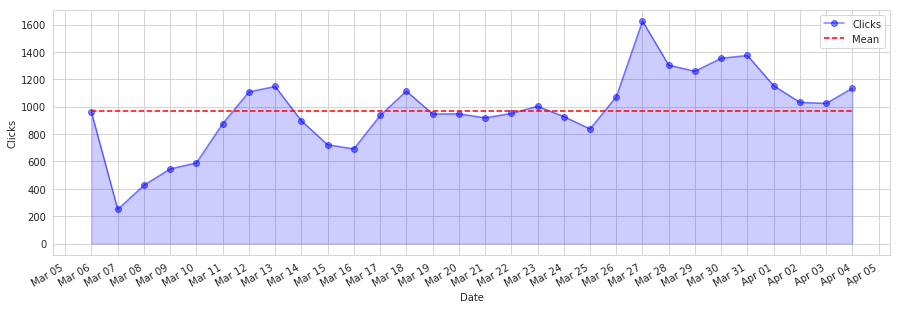

In [0]:
%matplotlib inline
import matplotlib.dates as mdates

print(f"Number of days: {data.Date.nunique()}")
data = data[['Date', 'Clicks']]
# data.set_index('Date',inplace=True)

#plot data
fig, ax = plt.subplots(figsize=(15,5))

# plot the data
plt.plot(data['Date'], data['Clicks'], alpha=.5, color='b', label='Clicks', marker='o')
 
# plot the average line
plt.plot(data['Date'], [data['Clicks'].mean()] * data['Clicks'].shape[0], alpha=1, color='r', label='Mean', linestyle='--')

ax.fill_between(data['Date'].tolist(), 0, data['Clicks'].tolist(), color='b', alpha=.2)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xlabel('Date')
plt.ylabel('Clicks')
ax.legend()
plt.gcf().autofmt_xdate()
plt.show()

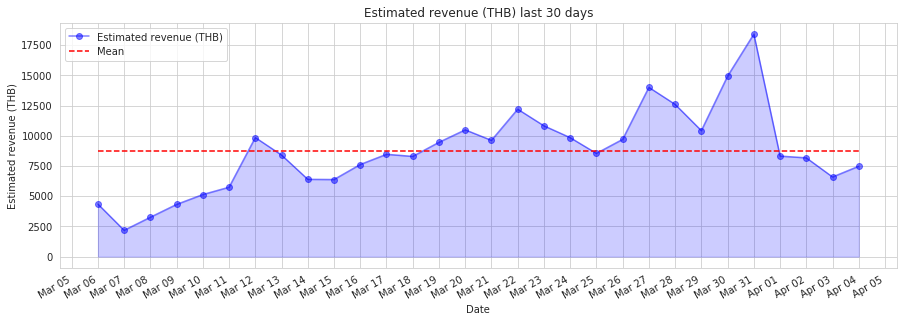

In [0]:
data = dataset[['Date'] + numberic_cols]\
.groupby(by=['Date']).sum()\
.reset_index().sort_values(by='Date', ascending=True)

data = data[['Date', 'Estimated revenue (THB)']]

# #plot data
fig, ax = plt.subplots(figsize=(15,5))

# plot the data
plt.plot(data['Date'], data['Estimated revenue (THB)'], alpha=.5, color='b', label='Estimated revenue (THB)', marker='o')
 
# plot the average line
plt.plot(data['Date'], [data['Estimated revenue (THB)'].mean()] * data['Estimated revenue (THB)'].shape[0], alpha=1, color='r', label='Mean', linestyle='--')
ax.fill_between(data['Date'].tolist(), 0, data['Estimated revenue (THB)'].tolist(), color='b', alpha=.2)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xlabel('Date')
plt.ylabel('Estimated revenue (THB)')
plt.title('Estimated revenue (THB) last 30 days')
ax.legend()
plt.gcf().autofmt_xdate()
plt.show()

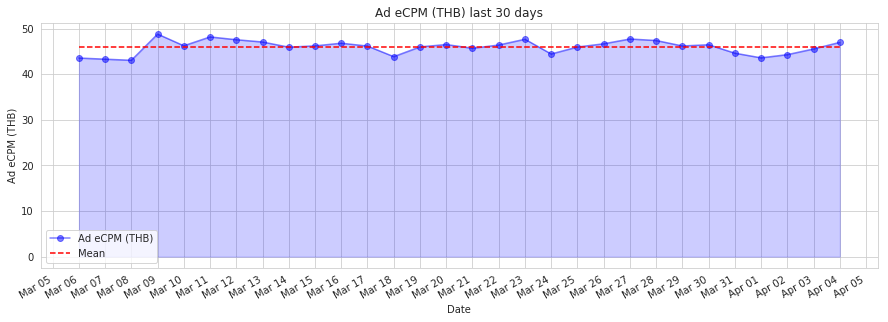

In [0]:
data = dataset[['Date'] + numberic_cols]\
.groupby(by=['Date']).mean()\
.reset_index().sort_values(by='Date', ascending=True)

data = data[['Date', 'Ad eCPM (THB)']]

# plot data
fig, ax = plt.subplots(figsize=(15,5))

# plot the data
plt.plot(
    data['Date'], 
    data['Ad eCPM (THB)'], 
    alpha=.5, color='b', marker='o',
    label='Ad eCPM (THB)'
)
 
# plot the average line
plt.plot(
    data['Date'], 
    [data['Ad eCPM (THB)'].mean()] * data['Ad eCPM (THB)'].shape[0], 
    alpha=1, color='r', linestyle='--',
    label='Mean'
)
ax.fill_between(
    data['Date'].tolist(), 0, data['Ad eCPM (THB)'].tolist(), 
    color='b', alpha=.2
)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xlabel('Date')
plt.ylabel('Ad eCPM (THB)')
plt.title('Ad eCPM (THB) last 30 days')
ax.legend()
plt.gcf().autofmt_xdate()
plt.show()

### By Ad locations

In [0]:
location = dataset[['Ad locations'] + numberic_cols]\
.groupby(by=['Ad locations']).mean()\
.sort_values(by='Ad eCPM (THB)', ascending=False)\
.reset_index().sort_values(by='Ad eCPM (THB)')
location

,Ad locations,Estimated revenue (THB),CPC (THB),Clicks,Ad requests,Ad request eCPM (THB),Ad impressions,Ad eCPM (THB),Matched requests,Matched eCPM (THB)
2,Above the fold,1.664725,0.517778,0.102425,229.260267,43.756997,27.094508,44.645324,27.804057,43.756997
1,Below the fold,63.006337,4.998786,7.035113,24530.824677,44.396491,1164.704462,45.987435,1225.547427,44.396491
0,Unknown,0.273892,0.048422,0.058054,151.632870,41.002200,4.551922,48.253148,6.174980,41.002200


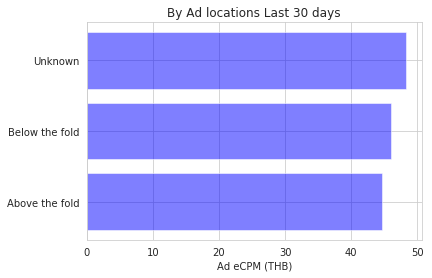

In [0]:
plt.barh(
    location['Ad locations'],
    location['Ad eCPM (THB)'],
    align='center',
    alpha=0.5,
    color='b'
)
# plt.ylabel('Ad locations')
plt.xlabel('Ad eCPM (THB)')
plt.title('By Ad locations Last 30 days')
plt.show()

### By Targeting types

In [0]:
target = dataset[['Targeting types'] + numberic_cols]\
.groupby(by=['Targeting types']).mean()\
.sort_values(by='Ad eCPM (THB)', ascending=False)[:-1]\
.reset_index().sort_values(by='Ad eCPM (THB)')
target

,Targeting types,Estimated revenue (THB),CPC (THB),Clicks,Ad requests,Ad request eCPM (THB),Ad impressions,Ad eCPM (THB),Matched requests,Matched eCPM (THB)
3,(unknown),43.970135,3.709237,1.807980,866.782544,41.172668,809.304239,43.658489,866.782544,41.172668
2,Contextual,7.080406,2.040529,1.226264,155.322626,43.887827,148.425130,45.674388,155.322626,43.887827
1,Personalized,53.357390,2.947484,7.897054,1020.454073,44.847723,978.965338,47.603341,1020.454073,44.847723
0,Placement,20.173226,5.424839,0.504032,318.495968,63.714435,304.806452,65.615645,318.495968,63.714435


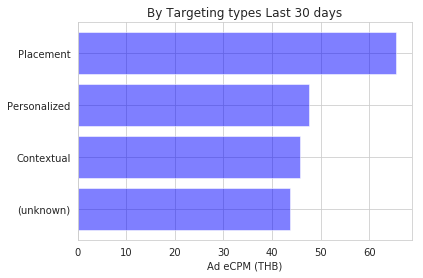

In [0]:
plt.barh(
    target['Targeting types'],
    target['Ad eCPM (THB)'],
    align='center',
    alpha=0.5,
    color='b'
)
# plt.ylabel('Targeting types')
plt.xlabel('Ad eCPM (THB)')
plt.title('By Targeting types Last 30 days')
plt.show()

### Correlation Matrix

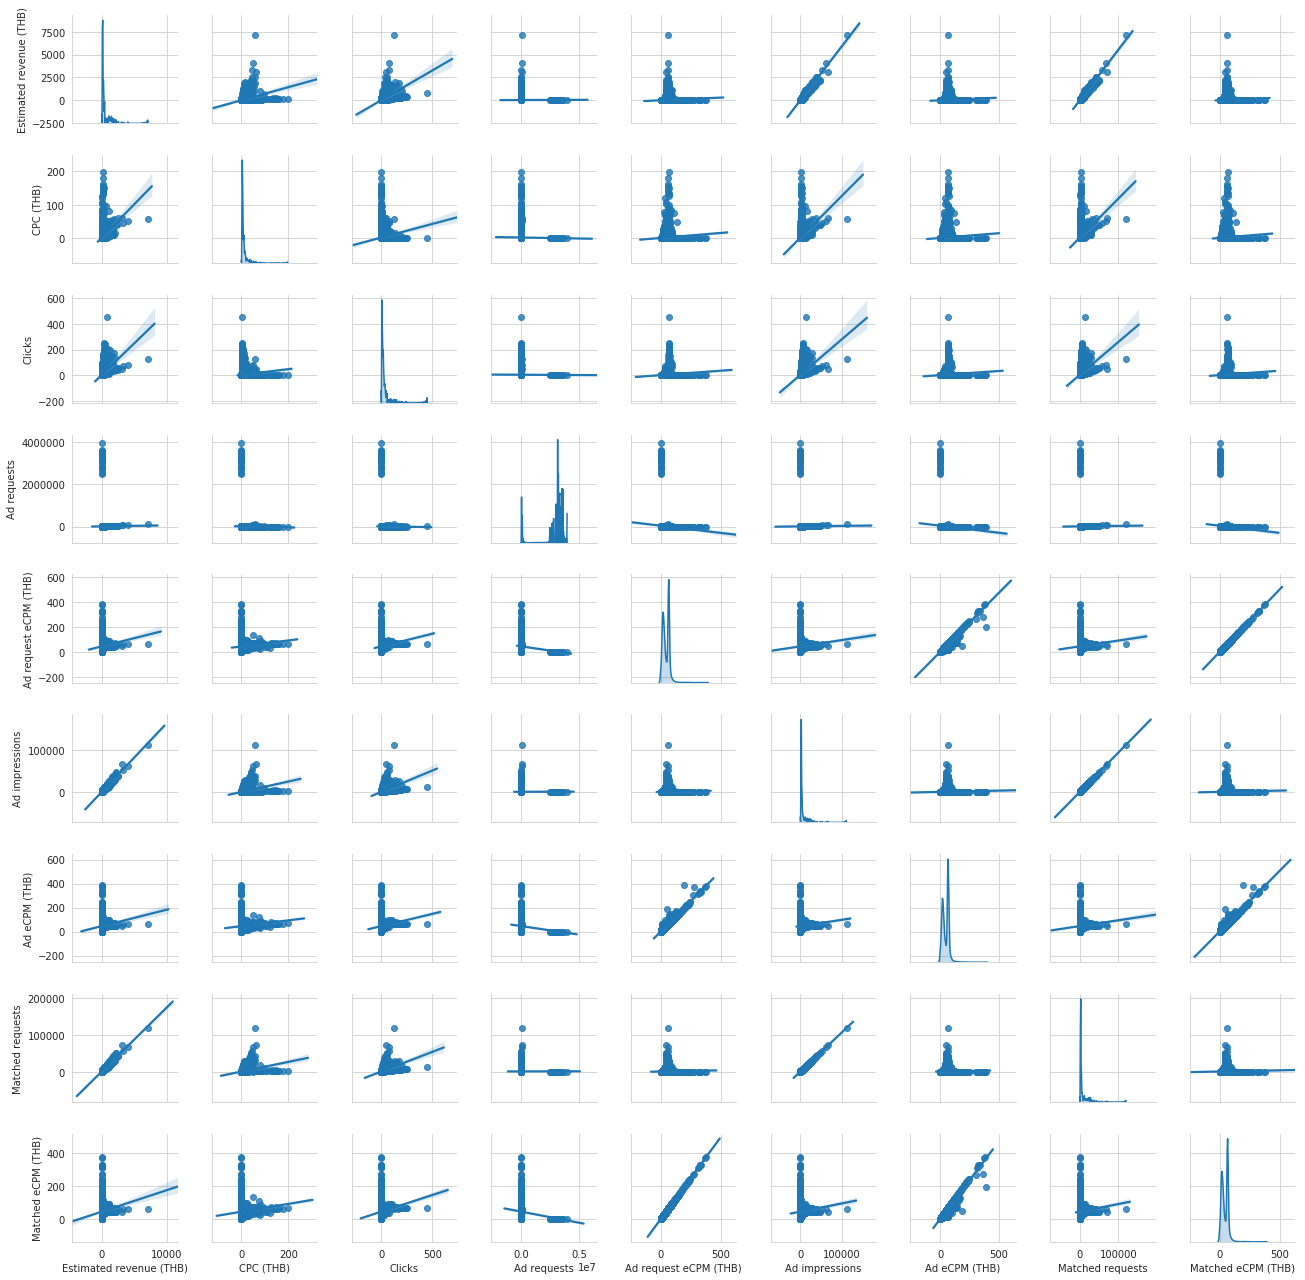

In [0]:
sns.pairplot(
    dataset[numberic_cols],
    diag_kind='kde',
    kind="reg",
    height=2,
)
plt.show()

In [0]:
corr = dataset[numberic_cols].corr()
corr

,Estimated revenue (THB),CPC (THB),Clicks,Ad requests,Ad request eCPM (THB),Ad impressions,Ad eCPM (THB),Matched requests,Matched eCPM (THB)
Estimated revenue (THB),1.000000,0.374666,0.565804,0.004637,0.087582,0.982395,0.088244,0.981537,0.087582
CPC (THB),0.374666,1.000000,0.133527,-0.011975,0.084158,0.390631,0.082092,0.389577,0.084158
Clicks,0.565804,0.133527,1.000000,-0.006349,0.118563,0.532052,0.114838,0.524963,0.118563
Ad requests,0.004637,-0.011975,-0.006349,1.000000,-0.096167,0.003632,-0.097637,0.003818,-0.096167
Ad request eCPM (THB),0.087582,0.084158,0.118563,-0.096167,1.000000,0.055860,0.975814,0.054979,1.000000
Ad impressions,0.982395,0.390631,0.532052,0.003632,0.055860,1.000000,0.056145,0.999857,0.055860
Ad eCPM (THB),0.088244,0.082092,0.114838,-0.097637,0.975814,0.056145,1.000000,0.055454,0.975814
Matched requests,0.981537,0.389577,0.524963,0.003818,0.054979,0.999857,0.055454,1.000000,0.054979
Matched eCPM (THB),0.087582,0.084158,0.118563,-0.096167,1.000000,0.055860,0.975814,0.054979,1.000000


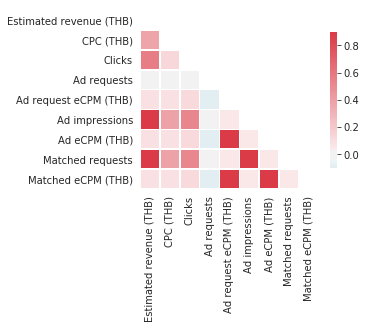

In [0]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Tips

In [0]:
"""
https://support.google.com/admanager/table/7568664?hl=en
https://support.google.com/admanager/answer/6334268?hl=en
https://support.google.com/admanager/answer/2554765?hl=en
https://support.google.com/admanager/table/7612037?visit_id=636904836386936270-2702305950&rd=2
https://roxot.com/blog/price-floors-first-price-auction
https://admanager.google.com/home/capabilities/yield-management/
"""

'\nhttps://support.google.com/admanager/table/7568664?hl=en\nhttps://support.google.com/admanager/answer/6334268?hl=en\nhttps://support.google.com/admanager/answer/2554765?hl=en\nhttps://support.google.com/admanager/table/7612037?visit_id=636904836386936270-2702305950&rd=2\nhttps://roxot.com/blog/price-floors-first-price-auction\nhttps://admanager.google.com/home/capabilities/yield-management/\n'

### Google Ad Manager ###

    DoubleClick for Publishers (DFP) & DoubleClick Ad Exchange (AdX)
    https://www.adpushup.com/blog/what-is-google-ad-manager/
